<img src="https://upload.wikimedia.org/wikipedia/commons/b/b6/New_Horizons_%28from_Launch_Press_Kit%29.jpg" style="text-align: center;"/>

In [1]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:95% !important; }</style>"))
from IPython.display import HTML

<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Orbits_of_2014_MU69%2C_Pluto%2C_Neptune%2C_and_New_Horizons.png" style="text-align: center;"/>

Sonda New Horizons została wyniesiona w przestrzeń kosmiczną z przylądka Canaveral na Florydzie, przy użyciu rakiety nośnej Atlas V 551, 19 stycznia 2006 roku.
Pierwsza połowa kwietnia 2015 – sonda wykonała zdjęcia, na których są widoczne struktury powierzchni Plutona.   

<img src="https://cdn.shopify.com/s/files/1/2372/6989/products/image_plutoselfie_black_51_600x.png?v=1510578158" style="text-align: center;"/>

Tak duże wyadrzenia (nie codziennie wysyłamy sondę która ma dotrzeć na granice naszego układu słonecznego) jakim jest wysłanie sondy i otrzymanie tak wielu informacji o obszarze słabo zbadanym nie mogło przejść bez echa. Od tamtego czasu sypią jak z rękawa się nowe informacje na temat Plutona. Wydaje się, że nawet bez zagłębiania się w artykuły naukowe możemy zaobserwować zwiększą ilość informacji na ten temat.  

Ale to są tylko nasze przypuszczenia. Co możemy zrobić żeby to sprawdzić?
Przeprowadźmy się w czasie tej prezentacji przez taką mini analizę.
Po pierwsze, wybierzmy źródło danych -- gdzie można znaleźć stale updatującą się bazę wiedzy i nie jest to Encyklopedia Britanica (jedyne 32 tomy)? Wikipedia! Weźmy aktualne wersje atykułów (2018) oraz wersje z 2014 roku kiedy to sonda dokonywała pomiarów w okolicy Plutona.

## Co możemy sprawdzić?
Zmianę częstości wystąpień różnych słów (np. Pluton, planet, surface) w artykułach z Wikipedii.

## Agenda
1. Dlaczego Spark i PySpark?
2. Przygotowanie do analizy danych z jednej strony.
3. Rozszerzenie analizy na wiele artykułów.
5. Przygotowanie zestawów danych do wizualizacji.
4. Wizualizacje w Seabornie.

# 1. Dlaczego Spark i PySpark?

<img src="https://i.imgflip.com/2p94md.jpg" title="made at imgflip.com" style="text-align: center;"/>

# Dlaczego Spark?

Mamy dane, które nie mieszczą sie w pamięci RAM pojedynczej maszyny.
Co zrobić jeśli mamy więcej danych?
  
<img src="https://spark.apache.org/docs/latest/img/cluster-overview.png" style="text-align: center;"/>

## Spark i jego właściwości

Jest to open sourcowy projekt Apache, po raz pierwszy opublikowany w 2013 roku.  
Nie jest to język programowania, a framework do pracy z dużymi zbiorami danych w różnych językach (Java, Scala, Python, R).   
  
Spark:
- przechowuje wdane w pamięci podczas obliczeń, a nie zapisuje i ponownie wczytuje, dzięki czemu zyskuje na szybkości,
- jest również leniwy...  Nie wykonuje, żadnych operacji na danych, tak długo jak tego nie musi. Pozwala to optymalizować kolejność obliczeń,
- przetwarza dane w systemie rozproszonym.  

Python:
- jeśli przychodzisz "z analityki", to prawdopodobnie umiesz Pythona oraz SQL - niski próg wejścia,
- można używać funkcji PySparkowych, ale również Pythonowych,
- posiada dobrze rozwiniętą bibliotekę do machine learningu (MLlib). 

# 2. Przygotowanie do analizy danych z jednego artykułu.

<img src="https://monosnap.com/image/vMCqu6rEL925Jsnw2T0OZYoY2RvmRN.png" style="float:center;"/>

## Przygotowanie środowiska do pracy

Jeśli nie masz, zainstaluj:  
    1. Java 8
https://www.oracle.com/technetwork/java/javase/downloads/jdk8-downloads-2133151.html  
    
    2. Anaconda  
https://www.anaconda.com/download/  
    
    3. PySpark z Anacondy  
https://anaconda.org/conda-forge/pyspark

Niech moc będzie z Tobą, a StackOverflow będzie Twoim przewodnikiem.

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext

spark = SparkSession.builder.getOrCreate()
sqlContext = SQLContext(spark)

### Pierwszy krok
Załadujmy dane!  

Używając metody `.textFile(file_path)` importujemy dane z pliku tekstowego do formatu RDD.

In [16]:
new_horizons = spark.sparkContext.textFile('./text_files/New_Horizons.txt')

### RDD

Rdzeniem Sparka jest RDD (Resilient Distributed Dataset):
- Resilient - operacje na RDD nie zmieniają samego obiektu. RDD zawiera informacje o operacjach, które należy przeprowadzić, aby uzyskać końcową postać zbioru danych.
- Distributed - rozproszony system danych.
- Datset - czyli reprezentuje dane.

### Eksploracja danych

Sprawdźmy co znajduje się w pliku.

In [90]:
new_horizons.take(3)

["New Horizons is an interplanetary space probe that was launched as a part of NASA's New Frontiers program.[3] Engineered by the Johns Hopkins University Applied Physics Laboratory (APL) and the Southwest Research Institute (SwRI), with a team led by S. Alan Stern,[4] the spacecraft was launched in 2006 with the primary mission to perform a flyby study of the Pluto system in 2015, and a secondary mission to fly by and study one or more other Kuiper belt objects (KBOs) in the decade to follow.[5][6][7][8][9] It is the fifth artificial object to achieve the escape velocity needed to leave the Solar System.",
 '',
 "On January 19, 2006, New Horizons was launched from Cape Canaveral Air Force Station by an Atlas V rocket directly into an Earth-and-solar escape trajectory with a speed of about 16.26 kilometers per second (10.10\xa0mi/s; 58,500\xa0km/h; 36,400\xa0mph). At launch, it was the fastest probe ever launched from Earth[10], but was beaten[11] by the Parker Solar Probe on 12 August

# Clean up!

W takiej formie nie przetworzymy danych. Trzeba je wyczyścić.  

<img src="http://images.rapgenius.com/db88417a1cf0f911abb3db494a91efd3.400x225x40.gif" style="text-align: center;"/>

<img src="https://monosnap.com/image/3RwzShX6lUv6X4r4x5oplt8F8b02Ap.png" style="text-align: center;"/>

<img src="https://monosnap.com/image/FW21Ke1Csc0WmwAS0xpjx96WYqS97O.png" style="text-align: center;width:300px"/>

- zmieniamy wszystkie wielkie litery na małe  
`.lower()`

**map** :It returns a new RDD by applying a function to each element of the RDD.   Function in map can return only one item.

**flatMap**: Similar to map, it returns a new RDD by applying  a function to each element of the RDD, but output is flattened.
Also, function in flatMap can return a list of elements (0 or more).  

MORE:  
https://stackoverflow.com/questions/22350722/what-is-the-difference-between-map-and-flatmap-and-a-good-use-case-for-each

In [21]:
new_horizons_2 = new_horizons.map(lambda row: row.lower())
new_horizons_2.take(1)

["new horizons is an interplanetary space probe that was launched as a part of nasa's new frontiers program.[3] engineered by the johns hopkins university applied physics laboratory (apl) and the southwest research institute (swri), with a team led by s. alan stern,[4] the spacecraft was launched in 2006 with the primary mission to perform a flyby study of the pluto system in 2015, and a secondary mission to fly by and study one or more other kuiper belt objects (kbos) in the decade to follow.[5][6][7][8][9] it is the fifth artificial object to achieve the escape velocity needed to leave the solar system."]

- usuwamy wszystkie znaki, które nie są małymi literami alfabetu łacińskiego za pomocą wyrażenia regularnego  
`re.sub('[^a-z ]', " ", str(RDD))`

In [22]:
import re
new_horizons_3 = new_horizons_2.map(lambda row:(re.sub('[^a-z ]', "", str(row))))
new_horizons_3.take(1)

['new horizons is an interplanetary space probe that was launched as a part of nasas new frontiers program engineered by the johns hopkins university applied physics laboratory apl and the southwest research institute swri with a team led by s alan stern the spacecraft was launched in  with the primary mission to perform a flyby study of the pluto system in  and a secondary mission to fly by and study one or more other kuiper belt objects kbos in the decade to follow it is the fifth artificial object to achieve the escape velocity needed to leave the solar system']

- i dzielimy  
`.split()`

In [24]:
new_horizons_3.flatMap(lambda row: row.split()).take(5)

['new', 'horizons', 'is', 'an', 'interplanetary']

## Ale może funkcja?

In [25]:
def format_text_rdd(input_txt):
    first_formatting = input_txt.lower()
    second_formatting = re.sub('[^a-z ]', " ", str(first_formatting))
    output = second_formatting.split()
    return output

In [27]:
completely_new_horizons = new_horizons.flatMap(format_text_rdd)

In [28]:
completely_new_horizons.take(10)

['new',
 'horizons',
 'is',
 'an',
 'interplanetary',
 'space',
 'probe',
 'that',
 'was',
 'launched']

In [30]:
from pyspark.sql.types import *
horizon_df = spark.createDataFrame(completely_new_horizons, StringType())

In [31]:
horizon_df.show(10)

+--------------+
|         value|
+--------------+
|           new|
|      horizons|
|            is|
|            an|
|interplanetary|
|         space|
|         probe|
|          that|
|           was|
|      launched|
+--------------+
only showing top 10 rows



## DataFrame
Wrazm z przejściem Sparka do wersji 2.0 RDD zostały zastąpione przez DataFrame.
DataFrame:
- jest abstrakcją nałożoną na RDD,
- przechowuje dane w wierszach i kolumach, co jest zdefiniowane w schemie,
- każda kolumna przechowuje zmienną, a każdy wiersz przchowuje wartość zmiennej.


In [35]:
horizon = horizon_df.withColumnRenamed('value', 'word')

In [36]:
horizon.groupBy('word')\
       .count()\
       .orderBy('count', 
                ascending=False)\
       .show(10)

+-----+-----+
| word|count|
+-----+-----+
|  the|  717|
|   of|  309|
|  and|  245|
|   to|  233|
|    a|  191|
|   in|  140|
|  new|  113|
|  was|  112|
|pluto|  108|
|   on|  107|
+-----+-----+
only showing top 10 rows



In [37]:
stopwords = ['s', 'edit', 'the', 'a', 'an', 'and', 'or', 'for', 'to', 'too', 'also', 'in', 'his', 'do', 'will', 'it', 'they', 'from', 'been', 'mi', 'km', 'can', 'be', 'being', 'does', 'cannot', 'not', 'on', 'at', 'any', 'when', 'have', 'had', 'has', 'is', 'are', 'only', 'some', 'because', 'then', 'was', 'were', 'by', 'of', 'that', 'which', 'when', 'while', 'than', 'as', 'with', 'other', 'but', 'over', 'into', 'up', 'all', 'begin', 'began', 'before', 'after', 'back', 'through', 'now', 'never', 'none', 'would', 'this', 'those', 'these', 'them', 'their', 'about', 'there', 'within', 'its']

In [38]:
import pyspark.sql.functions as F
new_horizon = horizon.where(~F.col('word').isin(stopwords))

In [96]:
new_horizon.groupBy('word')\
           .count()\
           .orderBy('count', 
                    ascending=False)\
           .show(8)

+----------+-----+
|      word|count|
+----------+-----+
|       new|  113|
|     pluto|  108|
|  horizons|  101|
|spacecraft|   88|
|   mission|   49|
|      data|   36|
|       two|   35|
|    system|   34|
+----------+-----+
only showing top 8 rows



In [40]:
new_horizon.count()

5656

In [41]:
pluto = spark.sparkContext.textFile('./text_files/Pluto.txt')
pluto_archive = spark.sparkContext.textFile('./text_files/Pluto_archive.txt')
pluto2 = pluto.flatMap(format_text_rdd)
pluto_archive_2 = pluto_archive.flatMap(format_text_rdd)
pluto_df = spark.createDataFrame(pluto2, StringType())
pluto_archive_df = spark.createDataFrame(pluto_archive_2, StringType())
pluto_count = pluto_df.where(~F.col('value').isin(stopwords))
pluto_archive_count = pluto_archive_df.where(~F.col('value').isin(stopwords))

# To jak wygląda liczba słów dla artykułu o Plutonie?

In [42]:
pluto_count.count()

3646

In [43]:
pluto_archive_count.count()

3942

<img src="https://media1.tenor.com/images/8474b0f567704b752354d6e5a589784b/tenor.gif" style="float: center;"/>

# Rozszerzenie przygotowania danych na wiele artykułów.

<img src="https://monosnap.com/image/SxkmbubOSzZ4JkItjNi2ITXtuiuJDw.png" style="text-align: center;"/>

<img src="http://i.imgur.com/7limn.gif" aligh=middle/>

In [47]:
files_list = ! ls './text_files/'

<img src="https://i.gifer.com/72nt.gif" align=middle/>

In [48]:
files_list

['Dwarf_planet.txt',
 'Dwarf_planet_archive.txt',
 'New_Horizons.txt',
 'New_Horizons_archive.txt',
 'Planet.txt',
 'Planet_archive.txt',
 'Pluto.txt',
 'Pluto_archive.txt']

https://stackoverflow.com/questions/11968976/list-files-only-in-the-current-directory

In [ ]:
for file in files_list:
    text_rdd = spark.sparkContext.textFile('./text_files/'+file)

In [ ]:
for file in files_list:
    text_rdd = spark.sparkContext.textFile('./text_files/'+file)
    formated_text_rdd = text_rdd.flatMap(format_text_rdd)

In [ ]:
for file in files_list:
    text_rdd = spark.sparkContext.textFile('./text_files/'+file)
    formated_text_rdd = text_rdd.flatMap(format_text_rdd)
    text_df = spark.createDataFrame(formated_text_rdd, StringType())

In [ ]:
for file in files_list:
    text_rdd = spark.sparkContext.textFile('./text_files/'+file)
    formated_text_rdd = text_rdd.flatMap(format_text_rdd)
    text_df = spark.createDataFrame(formated_text_rdd, StringType())
    
    text_words = \
        (text_df.withColumnRenamed('value', 'word')
                .where(~F.col('word').isin(stopwords)))

In [49]:
schema = StructType([StructField('word', StringType(),False)])
empty = spark.createDataFrame(spark.sparkContext.emptyRDD(), schema)
final_df = empty

for file in files_list:
    text_rdd = spark.sparkContext.textFile('./text_files/'+file)
    formated_text_rdd = text_rdd.flatMap(format_text_rdd)
    text_df = spark.createDataFrame(formated_text_rdd, StringType())
    
    text_words = \
        (text_df.withColumnRenamed('value', 'word')
                .where(~F.col('word').isin(stopwords)))
    
    column_name = re.split('[.]', file)[0]
    #'Dwarf_planet.txt'
    
    text_word_count = \
        (text_words
         .groupBy('word')
         .agg(F.count('word').alias('{}'.format(column_name))))
    
    final_df = final_df.join(text_word_count, 'word', 'outer')
    
final_df.repartition(10).write.parquet("./Output/")

# 4. Przygotowanie zestawów danych do wizualizacji.

In [51]:
input_data = sqlContext.read.parquet('./Output/')

In [97]:
input_data.fillna(0).show(7)

+---------+------------+--------------------+------------+--------------------+------+--------------+-----+-------------+
|     word|Dwarf_planet|Dwarf_planet_archive|New_Horizons|New_Horizons_archive|Planet|Planet_archive|Pluto|Pluto_archive|
+---------+------------+--------------------+------------+--------------------+------+--------------+-----+-------------+
|  adapter|           0|                   0|           2|                   2|     0|             0|    0|            0|
|   angles|           0|                   0|           1|                   1|     0|             0|    0|            0|
|   barely|           0|                   0|           0|                   0|     1|             1|    0|            0|
|     came|           0|                   0|           1|                   1|     1|             1|    2|            3|
|desirable|           0|                   0|           1|                   1|     0|             0|    1|            1|
|  deviate|           0|

In [98]:
input_data.fillna(0).limit(7).toPandas()

,word,Dwarf_planet,Dwarf_planet_archive,New_Horizons,New_Horizons_archive,Planet,Planet_archive,Pluto,Pluto_archive
0,adapter,0,0,2,2,0,0,0,0
1,angles,0,0,1,1,0,0,0,0
2,barely,0,0,0,0,1,1,0,0
3,came,0,0,1,1,1,1,2,3
4,desirable,0,0,1,1,0,0,1,1
5,deviate,0,1,0,0,0,0,0,0
6,evolution,1,0,0,0,0,0,0,0


## Co możemy sprawdzić?
Zmianę częstości wystąpień różnych słów (np. Pluton, planet, surface) w artykułach z Wikipedii.


<img src="https://i.imgflip.com/2p9kj1.jpg" style="float: center;width:600px"/>

<img src="https://monosnap.com/image/cgriJaXZK9UUsbdjfm10UZR1P2nNS3.png" style="float: center;"/>

- Wybieramy sumę każdego ze słów dla zbioru historycznego i bieżącego z użuyciem `.withColumn()`.

In [91]:
data_current = input_data\
    .fillna(0)\
    .withColumn('current_word_sum', F.col('New_Horizons')+
                                    F.col('Dwarf_planet')+
                                    F.col('Planet')+
                                    F.col('Pluto'))\
    .withColumn('archive_word_sum', F.col('New_Horizons_archive')+
                                    F.col('Dwarf_planet_archive')+
                                    F.col('Planet_archive')+
                                    F.col('Pluto_archive'))\
    .select('word', 'current_word_sum', 'archive_word_sum')


In [92]:
data_current.show(5)

+---------+----------------+----------------+
|     word|current_word_sum|archive_word_sum|
+---------+----------------+----------------+
|  adapter|               2|               2|
|   angles|               1|               1|
|   barely|               1|               1|
|     came|               4|               5|
|desirable|               2|               2|
+---------+----------------+----------------+
only showing top 5 rows



- tworzymy kolumnę z różnicą słów.

In [93]:
full_dataset = data_current\
    .withColumn ('word_diff', F.col('current_word_sum')-
                              F.col('archive_word_sum'))

In [94]:
full_dataset.show(5)

+---------+----------------+----------------+---------+
|     word|current_word_sum|archive_word_sum|word_diff|
+---------+----------------+----------------+---------+
|  adapter|               2|               2|        0|
|   angles|               1|               1|        0|
|   barely|               1|               1|        0|
|     came|               4|               5|       -1|
|desirable|               2|               2|        0|
+---------+----------------+----------------+---------+
only showing top 5 rows



- Przygotowujemy dwa zbiory danych - do różnicy dodatniej i ujemnej słów.

In [95]:
positive_diff_vis_dataset = full_dataset\
    .select('word', 'word_diff')\
    .orderBy('word_diff', ascending=False)\
    .limit(6)\
    .toPandas()

negative_diff_vis_dataset = full_dataset\
    .select('word', 'word_diff')\
    .orderBy('word_diff', ascending=True)\
    .limit(6)\
    .withColumn('word_diff', F.abs(F.col('word_diff')))\
    .orderBy('word_diff', ascending=True)\
    .toPandas()

In [2]:
positive_diff_vis_dataset

NameError: name 'positive_diff_vis_dataset' is not defined

# 5. Wizualizacja wyniku.

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

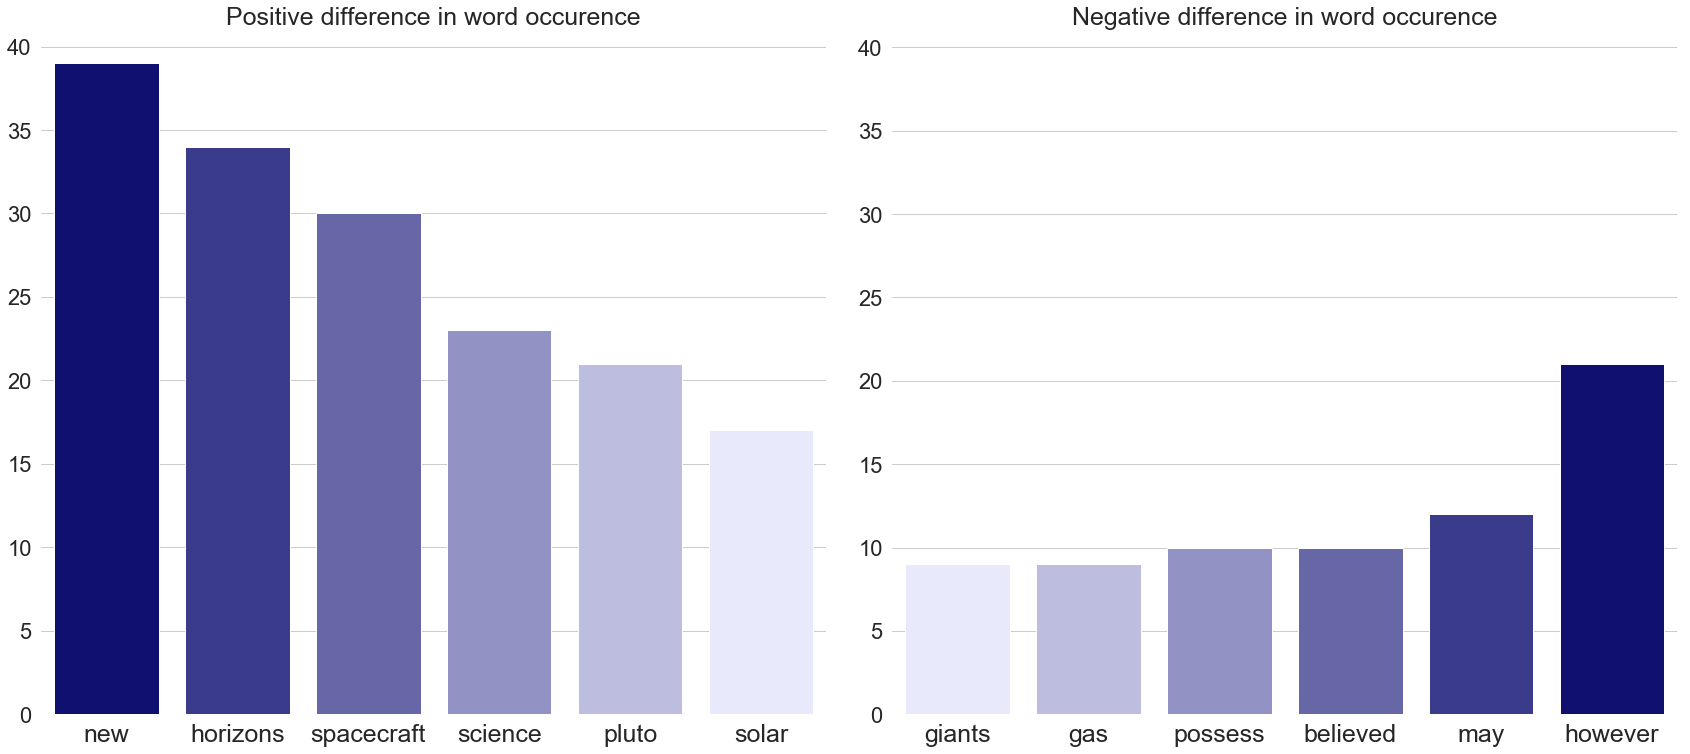

In [103]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 11), sharey=False)
sns.set(style="whitegrid", font_scale=2)
sns.despine(left=True, bottom=True, right=True)
sns.barplot(x="word", y="word_diff", data=plus_diff_vis_dataset, palette=sns.light_palette("navy", reverse=True, n_colors=6), ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=25)
ax1.set(ylabel=None, xlabel=None)
ax1.set_title('Positive difference in word occurence', fontsize=25)
sns.barplot(x="word", y="word_diff", data=minus_diff_vis_dataset, palette=sns.light_palette("navy", reverse=False, n_colors=6), ax=ax2)
ax2.set(ylabel=None, xlabel=None)
ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=25)
ax2.set_title('Negative difference in word occurence', fontsize=25)
plt.ylim(0, 41)
plt.tight_layout(h_pad=1);

<table><tr>
<td> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bd/PIA18179_d-Pluto270-Hubble2003-20100204.jpg/600px-PIA18179_d-Pluto270-Hubble2003-20100204.jpg" alt="Drawing" style="width: 800px;"/> </td>
<td> <img src="https://upload.wikimedia.org/wikipedia/commons/5/51/NH-Pluto-color-NewHorizons-20150713.png" alt="Drawing" style="width: 800px;"/> </td>
</tr></table>

<img src="https://thumbs.gfycat.com/WearyWillingEyra-size_restricted.gif" style="float: centered;"/>